# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# План работы

В ходе проекта исследуем влияние различных параметров на цену недвижимости. Для этого:
* Построим отдельные гистограммы для таких параметров как общая площадь, цена, количество комнат, тип этажа квартиры и тд;
* Исслелуем данные о времени продаж квартир;
* Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта;
* Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра, рассчитавсреднюю цену одного квадратного метра;
* Определим зависимость цены от расстояния до центра города.

In [129]:
import pandas as pd

In [130]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

 Выведем общую информацию о датафрейме - посмотрим информацию по каждому столбцу.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

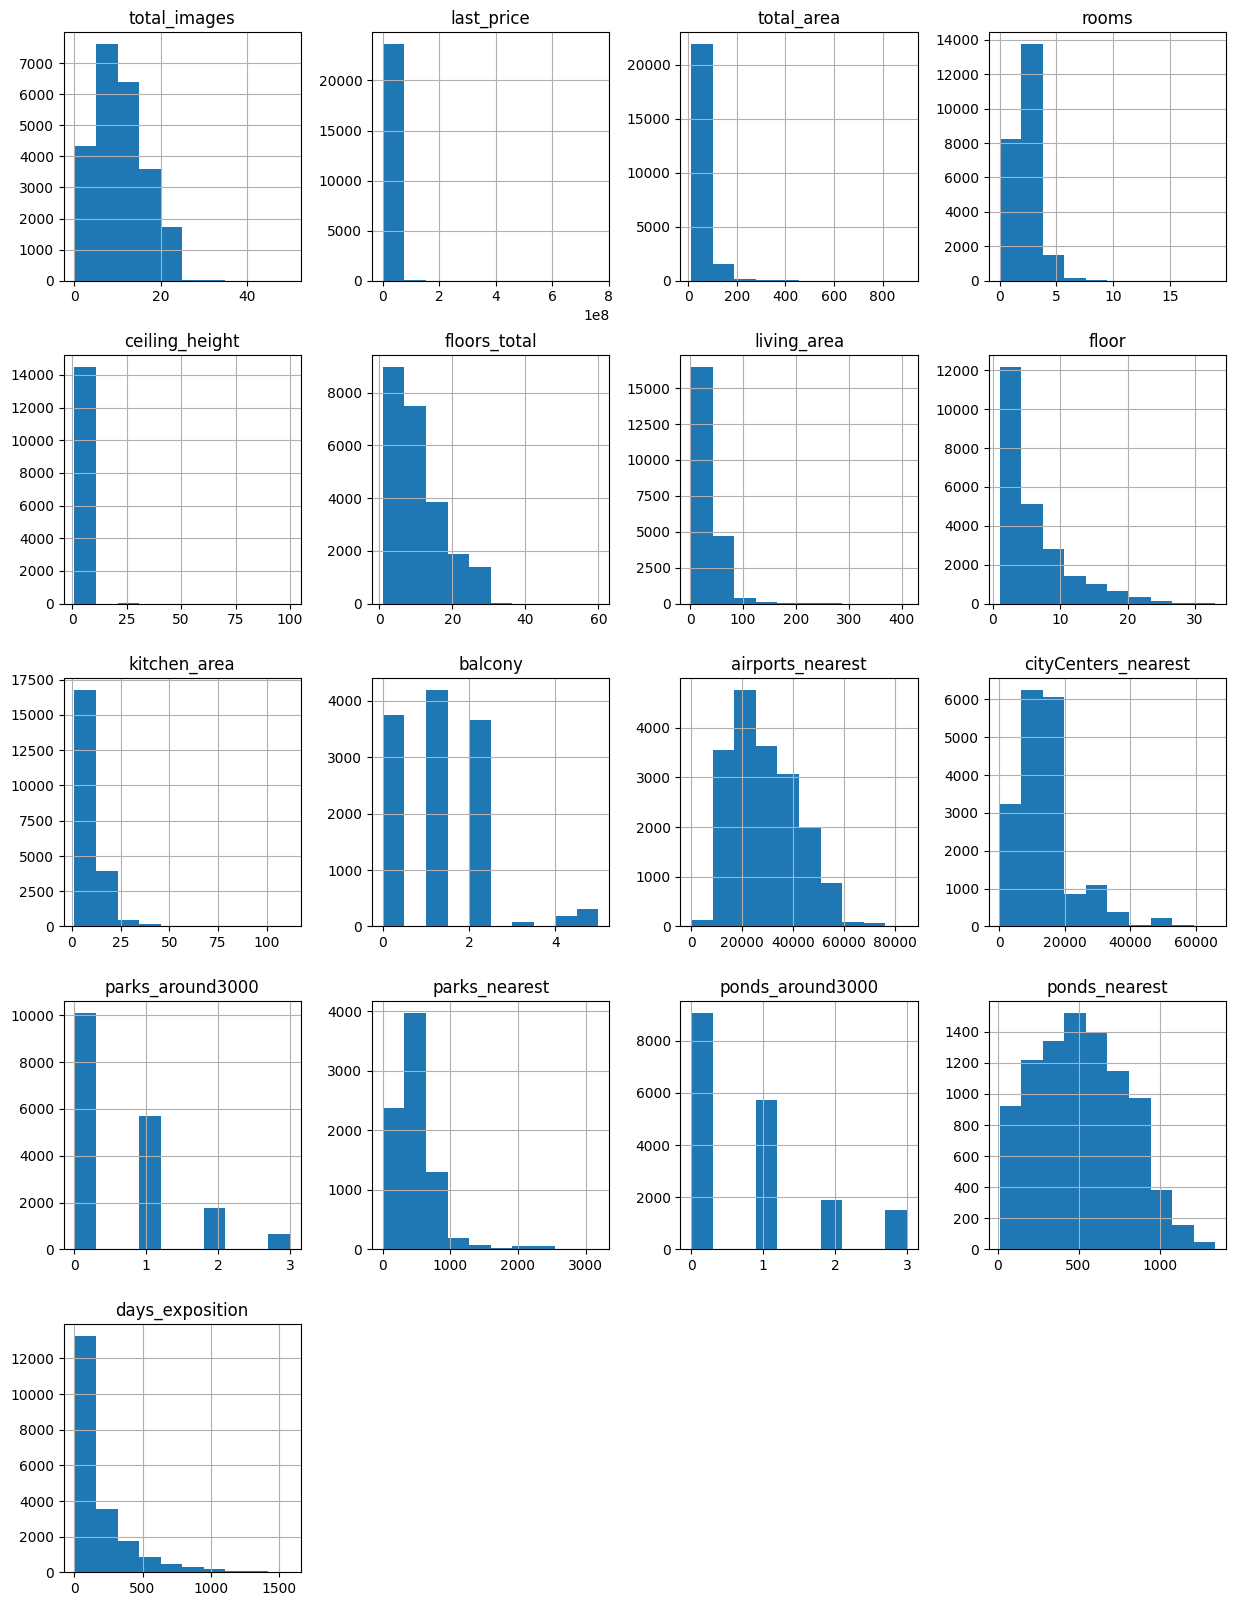

In [132]:
data.hist(figsize=(15, 20))

В данных имеются такие параметры:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Рассмотрим гистограммы по каждому числовому столбцу

Смотря на данные имеем:
* большое количество пропусков в столбцах с высотой потолков, жилой площадью, принадлежности к аппартаментам, количеством балконов, временем объявления, близости к паркам, водоемам. 
* неправильные типы данных в столбцах: количество балконов, признак аппартаментов, дата публикации, количество парков и водоёмов.
* Дубликаты в названиях населенных пунктов.
* Выбросы в количестве комнат.

### Выполните предобработку данных

In [133]:
data.isna().sum() # кол-во пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Is_apartment: в столбце булев тип данных. Так как 0 означает, что квартира не является апартаментом, можем заполнить пропуски нулями.  

In [134]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Balcony: столбец содержит кол-во балконов, следовательно если продавец не указал, их скорее всего нет. Пропуски заменим на 0  

In [135]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

parks_around3000, ponds_around3000: кол-во парков и водоёмов в радиусе 3 км. Аналогично в случае пропусков, вероятнее всего равно 0.

In [136]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum()

0

In [137]:
data['ponds_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'].isna().sum()

0

Ceiling_height, floors_total, living_area, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - эти столбцы оставлены без изменений. 

Причины, которые могли привести к пропускам в данных столбцах:
* Недостаток информации у продавца
* Человеческий фактор - забыли заполнить

Days_exposition - так как столбец с датой публикации не имеет пропусков, зная дату на момент сбора данных, можно для каждого пропущенного значения расчитать кол-во дней размещения объявления. На данный момент столбец оставлен без изменений. 

Снова выведем кол-во пропущенных значений:

In [138]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [139]:
data.info() # Еще раз проверим типы данных в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Приведем столбец first_day_exposition от object к datetime

In [140]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].dtype)

datetime64[ns]


У столбца floors_total не можем поменять тип данных на int64, так как имеем NaN значения, которые поддерживает только float64 тип данных. 

Можем поменять типы данных в столбцах с количеством балконов и признаком аппартаментов, так как мы заполнили пропуски 0:

In [141]:
data['is_apartment'] = data['is_apartment'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
print(data['balcony'].dtype, data['is_apartment'].dtype)

int64 int64


Аналогично сделаем с количеством парков и водоёмов в радиусе 3 км:

In [142]:
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
print(data['parks_around3000'].dtype, data['ponds_around3000'].dtype)

int64 int64


Посмотрим уникальные значения в столбце с населенным пунктом:

In [143]:
for elem in data['locality_name'].unique():
    print(elem)   

Санкт-Петербург
посёлок Шушары
городской посёлок Янино-1
посёлок Парголово
посёлок Мурино
Ломоносов
Сертолово
Петергоф
Пушкин
деревня Кудрово
Коммунар
Колпино
поселок городского типа Красный Бор
Гатчина
поселок Мурино
деревня Фёдоровское
Выборг
Кронштадт
Кировск
деревня Новое Девяткино
посёлок Металлострой
посёлок городского типа Лебяжье
посёлок городского типа Сиверский
поселок Молодцово
поселок городского типа Кузьмоловский
садовое товарищество Новая Ропша
Павловск
деревня Пикколово
Всеволожск
Волхов
Кингисепп
Приозерск
Сестрорецк
деревня Куттузи
посёлок Аннино
поселок городского типа Ефимовский
посёлок Плодовое
деревня Заклинье
поселок Торковичи
поселок Первомайское
Красное Село
посёлок Понтонный
Сясьстрой
деревня Старая
деревня Лесколово
посёлок Новый Свет
Сланцы
село Путилово
Ивангород
Мурино
Шлиссельбург
Никольское
Зеленогорск
Сосновый Бор
поселок Новый Свет
деревня Оржицы
деревня Кальтино
Кудрово
поселок Романовка
посёлок Бугры
поселок Бугры
поселок городского типа Рощино
Кириши

Видим, что есть дубликаты. Например, в таблице присутствует и «поселок Рябово», и «поселок городского типа Рябово». Заменим такие сочетания на одно. 

In [144]:
print(len(data['locality_name'].unique())) 

365


In [145]:
data['locality_name'] = (
    data['locality_name']
    .str.lower()
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'поселок станции'], 'поселок', regex=True)
    .replace(['садоводческое некоммерческое товарищество'], 'садовое товарищество', regex=True)
)

In [146]:
print(len(data['locality_name'].unique())) 

322


Таким образом, устранили неявные дубликаты в названиях населенных пунктов. 

### Добавьте в таблицу новые столбцы

In [147]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,1,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,1,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,2,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,2,48.0,121.0


In [148]:
# цена одного квадратного метра
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

In [149]:
# день недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday

In [150]:
# месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [151]:
# год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [152]:
# тип этажа квартиры
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(type_of_floor, axis=1)

In [153]:
# расстояние до центра города в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [154]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,482.0,1,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,90.0,1,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,84.0,2,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,112.0,2,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [155]:
data.info() # проверим типы данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  int64         
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

### Проведите исследовательский анализ данных

<Axes: >

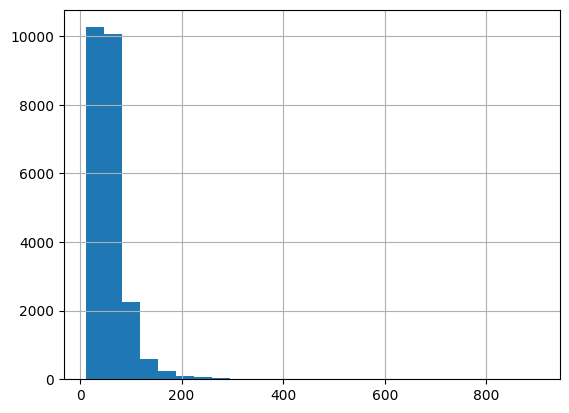

In [156]:
data['total_area'].hist(bins=25)

In [157]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Наиболее частые квартиры - площадью менее 100 м^2. 

<Axes: >

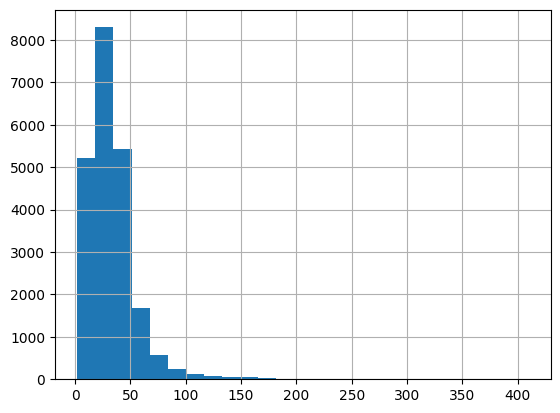

In [158]:
data['living_area'].hist(bins=25)

In [159]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь часто квартиры составляет от 5 до 50 м^2. Пик наблюдается около 30 м^2.

<Axes: >

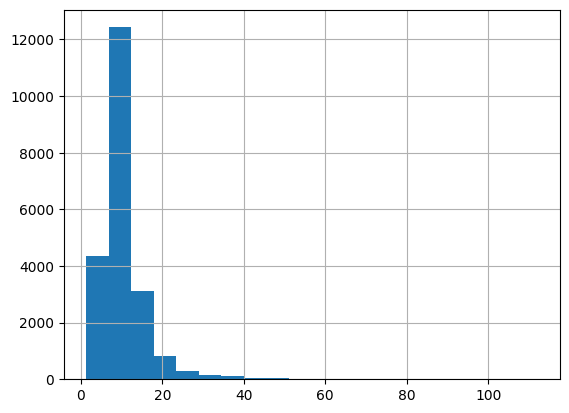

In [160]:
data['kitchen_area'].hist(bins=20)

In [161]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Площадь кухни, как правило до 18 м^2. Много квартир имеет площадь 10 м^2.

Смотря на гистограммы и описания, площади квартиры соотносятся с представлениями. Редких и выбивающихся значений не обнаружено. 

<Axes: >

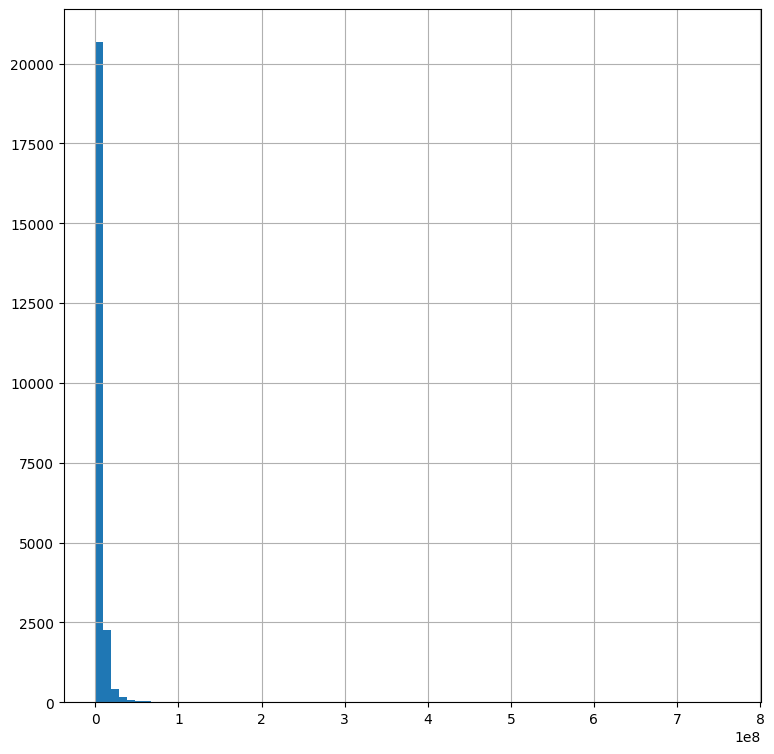

In [162]:
data['last_price'].hist(bins=80, figsize=(9, 9))

In [163]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [164]:
data['last_price'].value_counts()

last_price
4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: count, Length: 2978, dtype: int64

Много квартир находятся в ценовом диапазоне 3.5 - 4.5 млн. 

<Axes: >

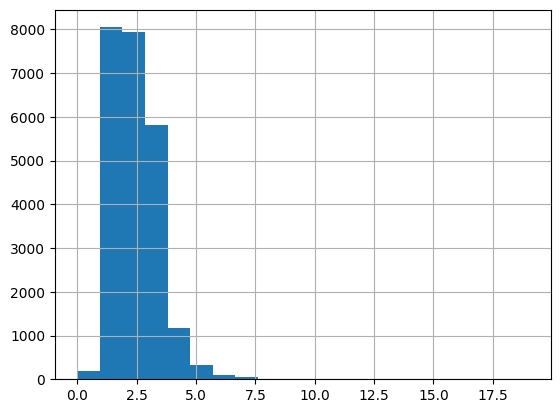

In [165]:
data['rooms'].hist(bins=20)

In [166]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Количество комнат в квартире часто от 1 до 5. 

Средняя цена по представлениям соотносится со средним количеством комнат. Максимальное количество комант - 19. Возможно это аномальное значение, однако оно не влияет на медиану и среднее, ну и в целом такое допустить можно. 

<Axes: >

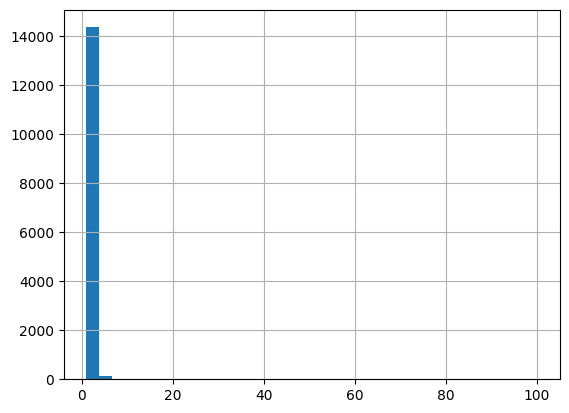

In [167]:
data['ceiling_height'].hist(bins=35)

In [168]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

По описанию видим аномальные значения - значения высоты потолка 1, 100 метров. Удалим аномальные значения. 

In [169]:
data.drop(data.loc[data['ceiling_height'] < 2].index, inplace=True)
data.drop(data.loc[data['ceiling_height'] > 6].index, inplace=True)

In [170]:
data['ceiling_height'].describe()

count    14472.000000
mean         2.726794
std          0.278705
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23667 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23667 non-null  int64         
 1   last_price              23667 non-null  float64       
 2   total_area              23667 non-null  float64       
 3   first_day_exposition    23667 non-null  datetime64[ns]
 4   rooms                   23667 non-null  int64         
 5   ceiling_height          14472 non-null  float64       
 6   floors_total            23581 non-null  float64       
 7   living_area             21764 non-null  float64       
 8   floor                   23667 non-null  int64         
 9   is_apartment            23667 non-null  int64         
 10  studio                  23667 non-null  bool          
 11  open_plan               23667 non-null  bool          
 12  kitchen_area            21395 non-null  float64    

Удалены потолки с высотой более 6 и менее 2 метров. Удалено около 30 строк. Снова построим гистограмму. 

<Axes: >

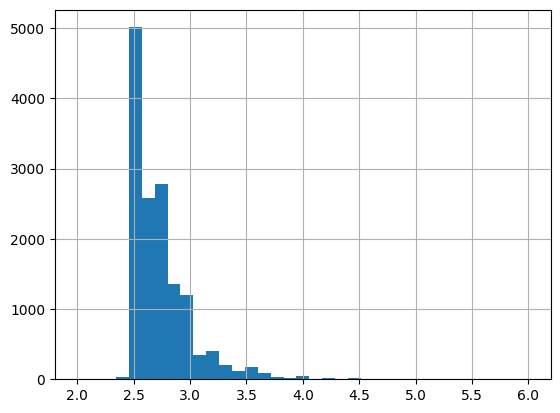

In [172]:
data['ceiling_height'].hist(bins=35)

Во многих квартирах высота потолка - 2.5 метра. Большая часть значений - до 3-х метров. 

<Axes: >

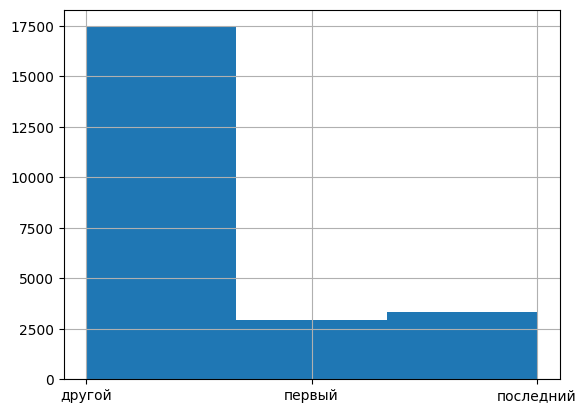

In [173]:
data['floor_type'].hist(bins=3)

Большая часть квартир находится на этаже, отличном от первого и последнего. 

<Axes: >

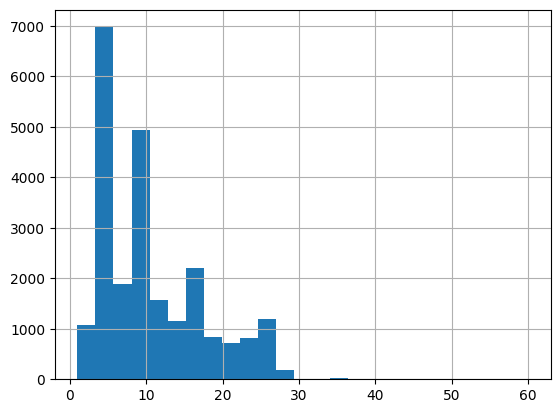

In [174]:
data['floors_total'].hist(bins=25)

Обычно в домах с выставленными на продажу квартирами до 10 этажей. 

<Axes: >

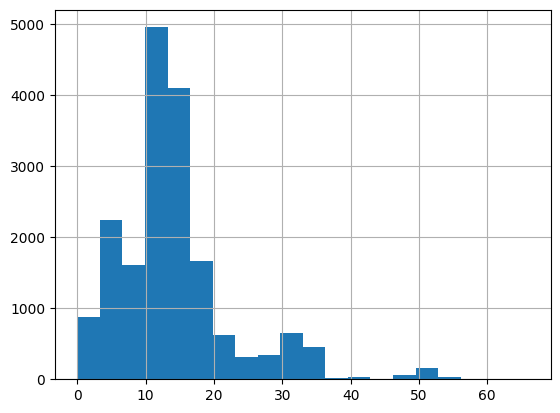

In [175]:
data['cityCenters_nearest_km'].hist(bins=20)

Обычно расстояние до центра от 10 до 17 километров. 

<Axes: >

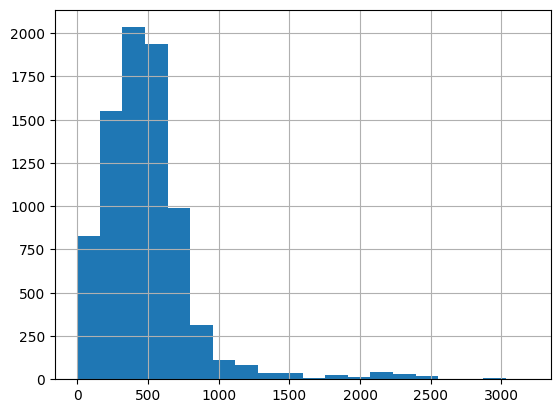

In [176]:
data['parks_nearest'].hist(bins=20)

Большинство квартир находятся в пределах 500 метров от ближайшего парка. 

Среднее: 180.91606480577786, Медиана: 95.0


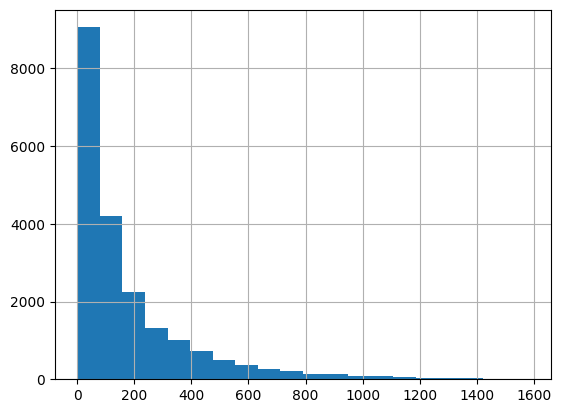

In [177]:
data['days_exposition'].hist(bins=20)
mean = data['days_exposition'].mean()
median = data['days_exposition'].median()
print(f'Среднее: {mean}, Медиана: {median}')

Много продаж совершилось спустя полтора месяца. Большая часть из них совершается от 3 до 45 дней, однако есть так же высокие показатели, выбивающиеся из общей тенденции - спустя 60 и 90 дней со дня размещения объявления.

In [178]:
data['days_exposition'].describe()

count    20492.000000
mean       180.916065
std        219.788950
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Учитывая значения первого квартиля, наиболее быстрые продажи - до 45 дней. Из последнего квартиля, наиболее долгие - более 250 дней. 

<Axes: xlabel='total_area'>

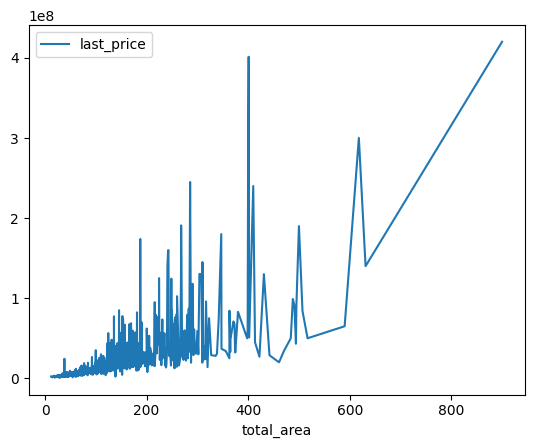

In [179]:
data.pivot_table(index='total_area', values='last_price').plot()

Цена квартиры с увеличением площади вырастает все быстрее. Пик цены наблюдается с площадью около 400 м²

<Axes: xlabel='living_area'>

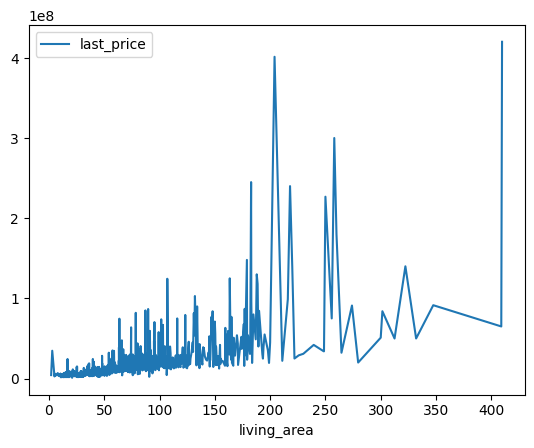

In [180]:
data.pivot_table(index='living_area', values='last_price').plot()

Аналогично цена квартиры с увеличением жилой площади вырастает все быстрее. Пик цены наблюдается с площадью около 200 м². После него цена сильно варьируется. 

<Axes: xlabel='kitchen_area'>

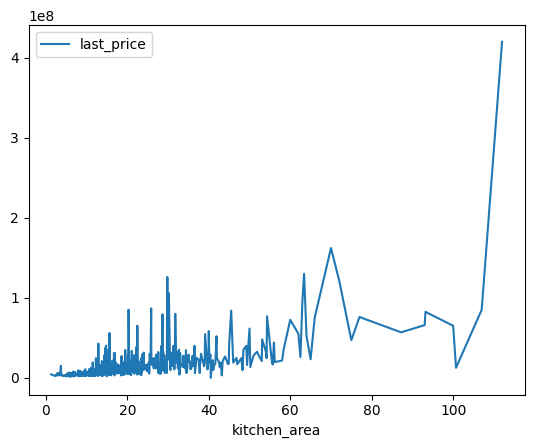

In [181]:
data.pivot_table(index='kitchen_area', values='last_price').plot()

Зависимость цены квартиры от площадь кухни более плавная. График постепенно растет. Однако около 70 м² пик все же наблюдается. После него с увеличением площади цена наоборот падает. Зависимость прослеживается менее явно. 

<Axes: xlabel='rooms'>

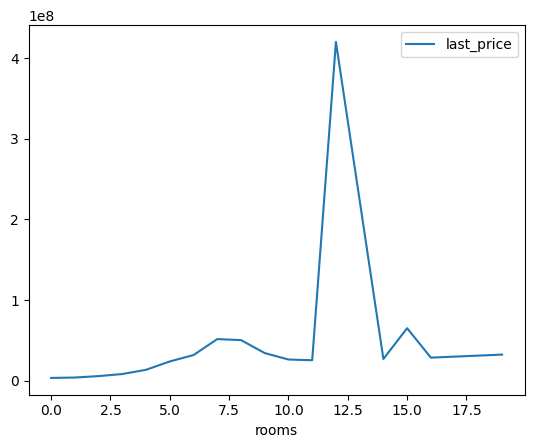

In [182]:
data.pivot_table(index='rooms', values='last_price').plot()

График относительно плавный. Можно сделать вывод, что количество комнат не влияет на цену квартиры

<Axes: xlabel='floor_type'>

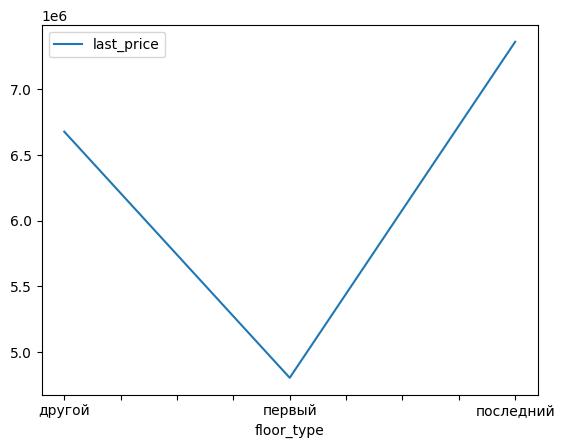

In [183]:
data.pivot_table(index='floor_type', values='last_price').plot()

Зависимость цены от типа этажа явно прослеживается. На первом этаже самые дешевые квартиры. 

<Axes: xlabel='first_day_exposition'>

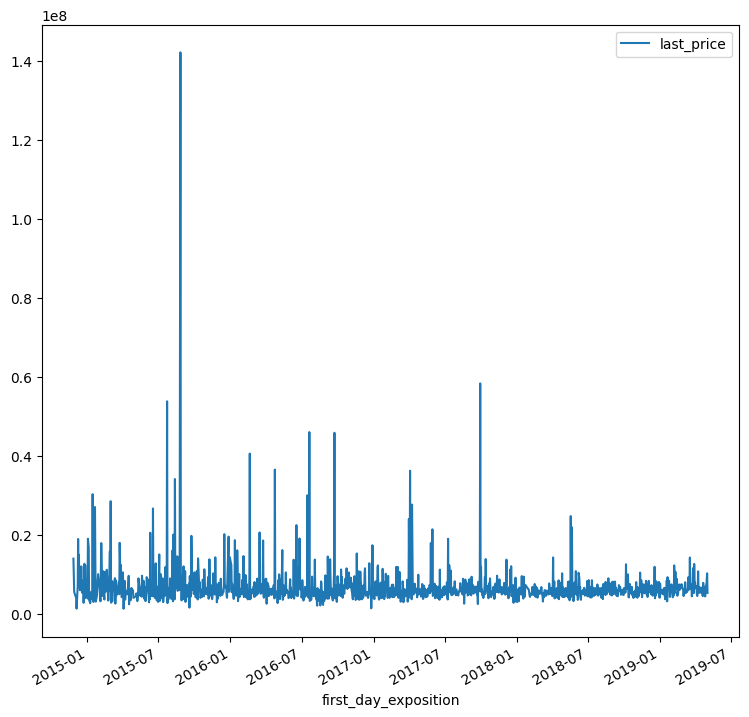

In [184]:
data.pivot_table(index='first_day_exposition', values='last_price').plot(figsize=(9, 9))

<Axes: xlabel='year'>

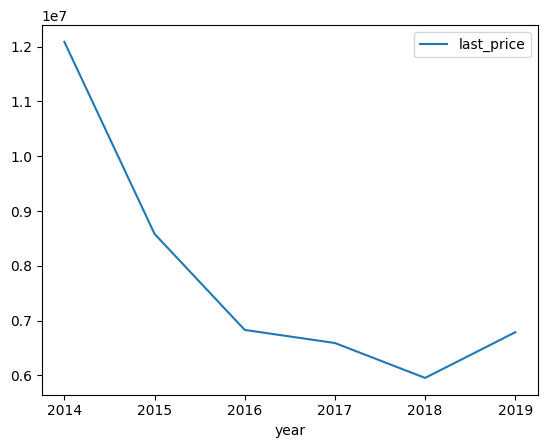

In [185]:
data.pivot_table(index='year', values='last_price').plot()

<Axes: xlabel='weekday'>

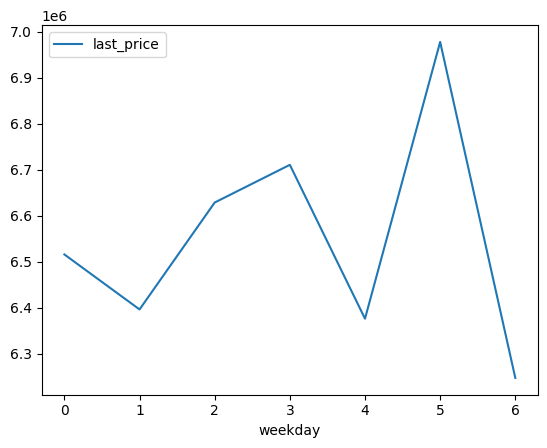

In [186]:
data.pivot_table(index='weekday', values='last_price').plot()

<Axes: xlabel='month'>

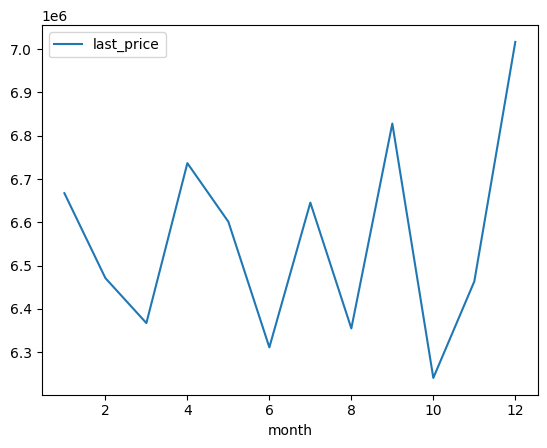

In [187]:
data.pivot_table(index='month', values='last_price').plot()

Цены на квартиру падают с каждым годом падают. Возможно люди с каждом годом хотят продать квартиру все быстрее. Зависимость от месяца не прослеживается. Наиболее дорогие квартиры размещают по пятницам. Однако явной зависимости от дня недели нет.

In [188]:
data2 = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['mean','count'])
data2.columns = ['mean_price_square_meter', 'exposition_count']
data2 = data2.sort_values('exposition_count', ascending=False)
data2 = data2[:10]
data2

,mean_price_square_meter,exposition_count
locality_name,,
санкт-петербург,114830.401497,15702
поселок мурино,85656.214350,554
поселок шушары,78677.364318,440
всеволожск,68654.473970,398
пушкин,103125.819377,369
колпино,75424.579112,338
поселок парголово,90175.913089,327
гатчина,68757.678399,306
деревня кудрово,92473.547559,299


     Смотря на таблицу понимаем, что наибольшая стоимость квартиры в Санкт-Петербурге - 114.830 р., наименьшая в Выборге - 58.141 р.

In [189]:
data3 = data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
data3.head(10)

,last_price
cityCenters_nearest_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.113554e+07
4.0,1.330909e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.969961e+06


In [190]:
data3.tail(10)

,last_price
cityCenters_nearest_km,
20.0,5.944080e+06
21.0,5.493469e+06
22.0,5.415524e+06
23.0,4.985376e+06
24.0,3.854430e+06
25.0,4.052840e+06
26.0,3.973013e+06
27.0,8.300000e+06
28.0,5.026429e+06


<Axes: xlabel='cityCenters_nearest_km'>

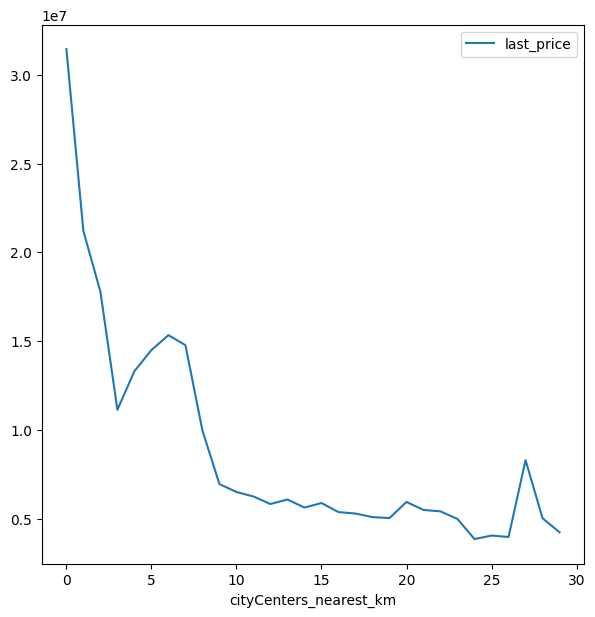

In [191]:
data3.plot(figsize=(7, 7))

Cтоимость объектов уменьшается при увеличении расстояния до центра города.  

In [192]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,482.0,1,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,90.0,1,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,84.0,2,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,112.0,2,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Напишите общий вывод

 В ходе проекта была проведена работа с графиками, построены диаграммы зависимостей различных параметров и цены и исследованы сводные таблицы. 
 
 Выяснили, что на цену квартиры влияет ряд параметров:
 * Цена квартиры быстро растет от увеличения площади и уменьшения расстояния до центра города. 
 * Количество комнат почти не влияют. 
 * Квартиры на первом этаже стоят значительно дешевле. 
 * Не влияет дата размещения объявления (день недели, месяц)
 * Зависимость от месяца не прослеживается.
 * Цены на квартиру падают с каждым годом падают.
 * Наиболее дорогие квартиры размещают по пятницам. 

Наиболее дорогая недвижимость в Сестрорецке, а самая дешевая в деревне Старополье.

Таким образом, мы установили какие параметры влияют на рыночную стоимость недвижимости. 